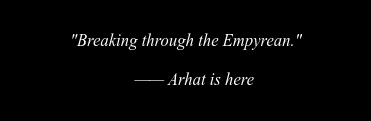

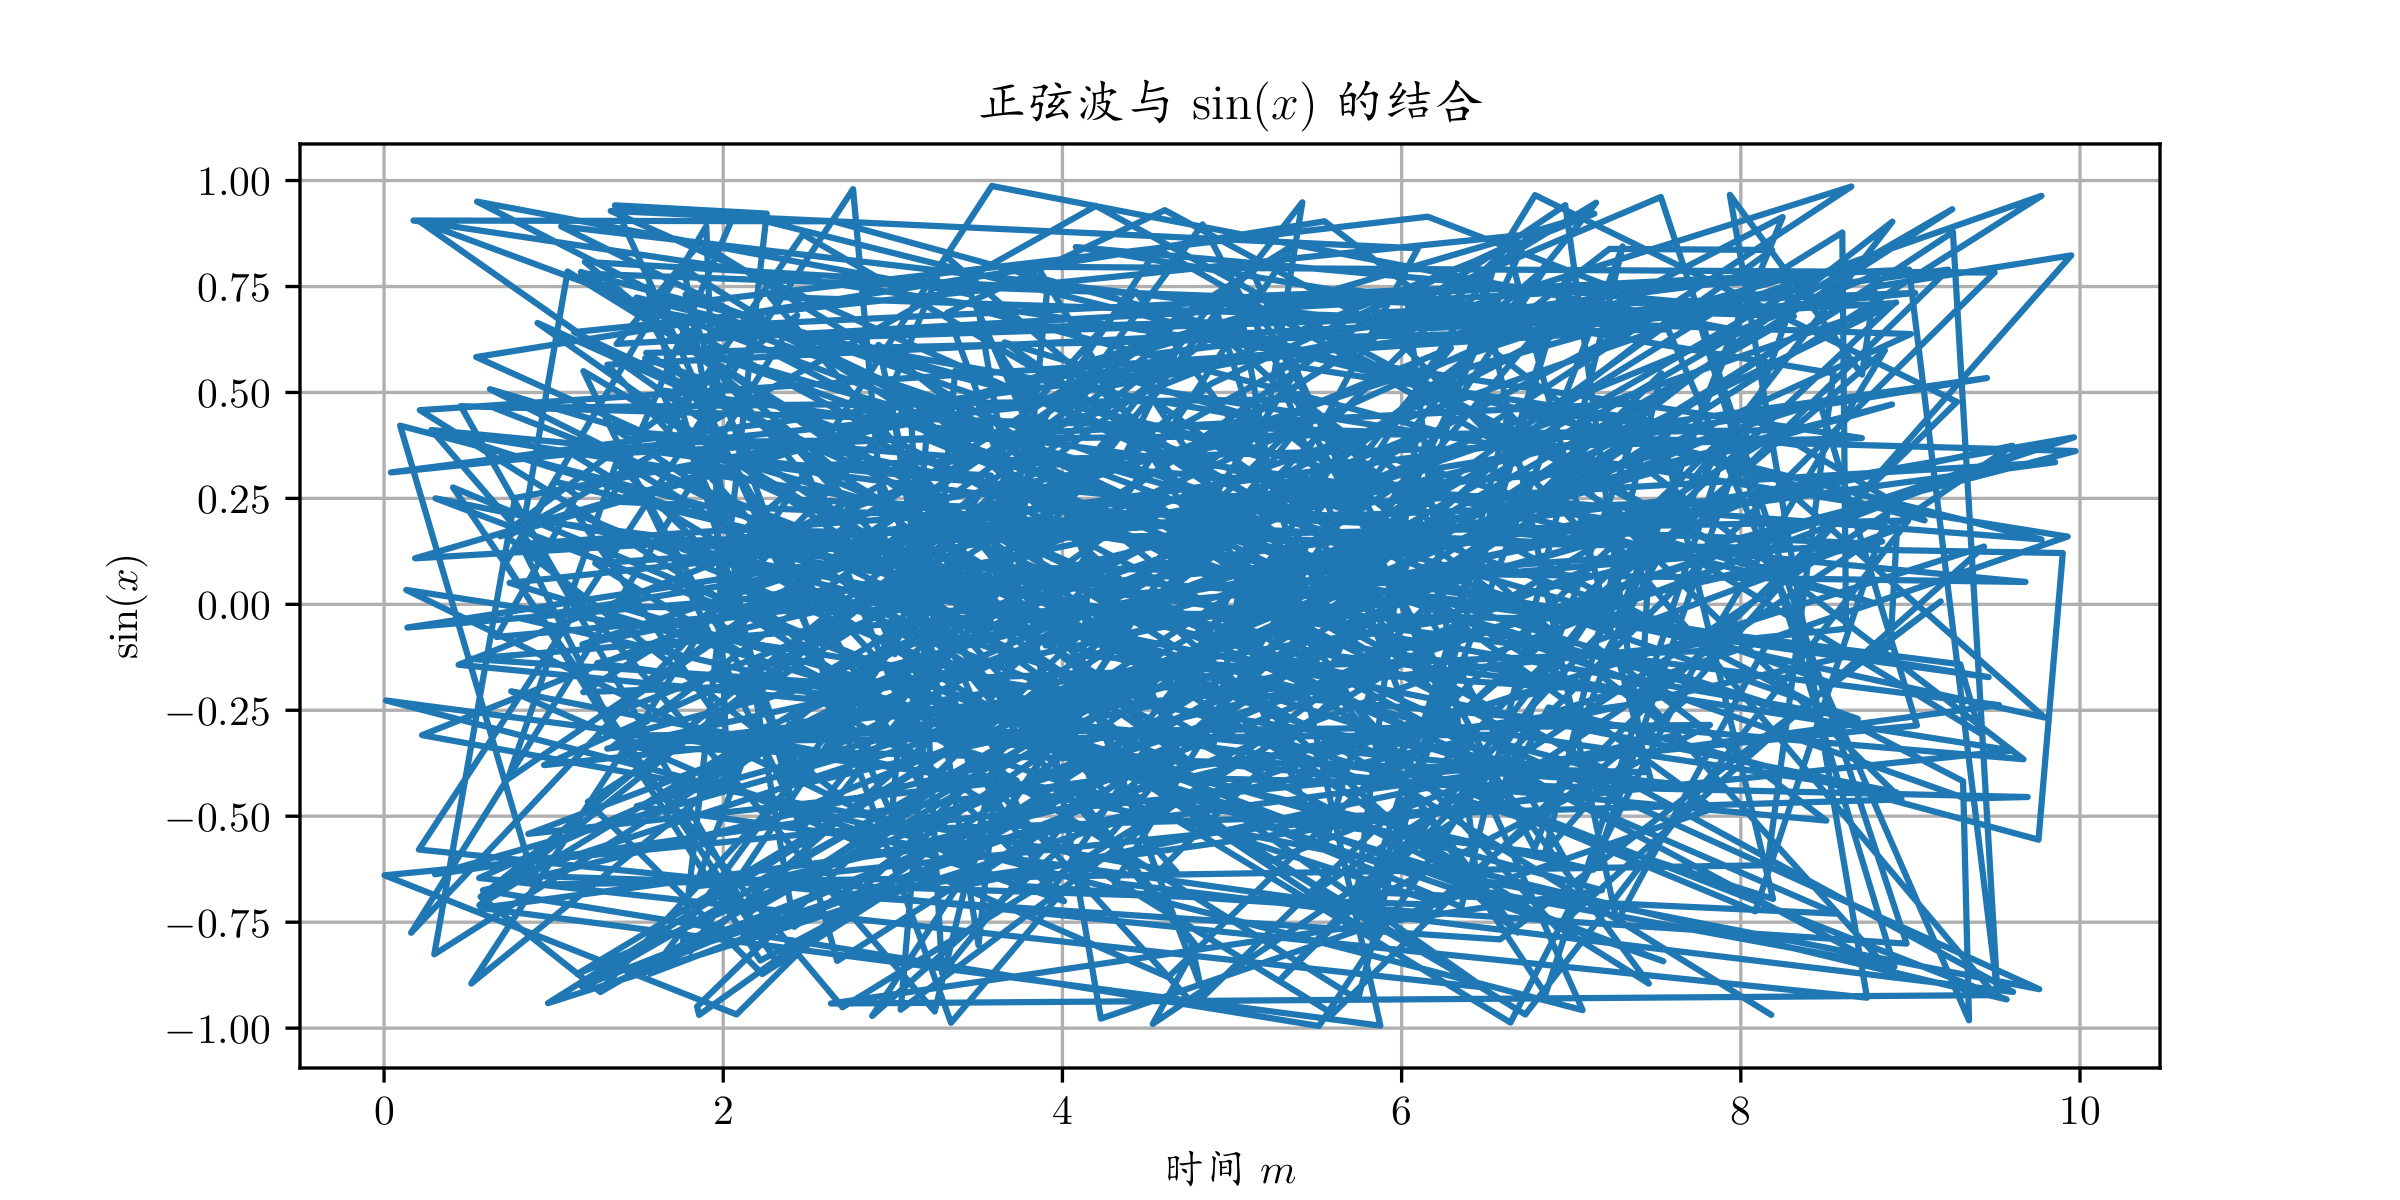

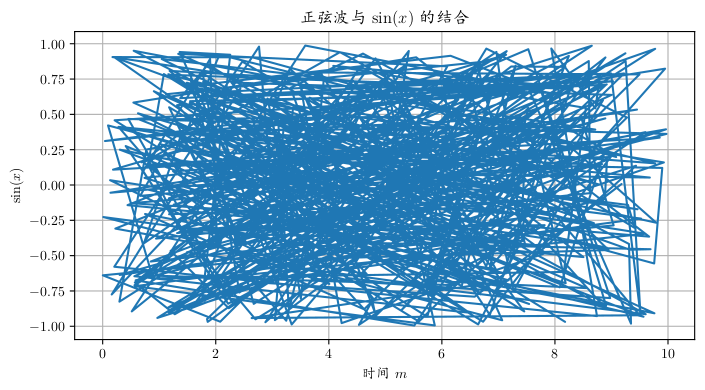

In [1]:
from arpy import visual
import random

# Generate random list of numbers for x and y data
x = [random.uniform(0, 10) for _ in range(500)]
y = [random.uniform(-1, 1) for _ in range(500)]

# Use the function with random data
visual.plot(
    x_data=x,
    y_data=y,
    xlabel=r"时间 $m$",
    ylabel=r"$\sin(x)$",
    title=r"正弦波与 $\sin(x)$ 的结合",
)


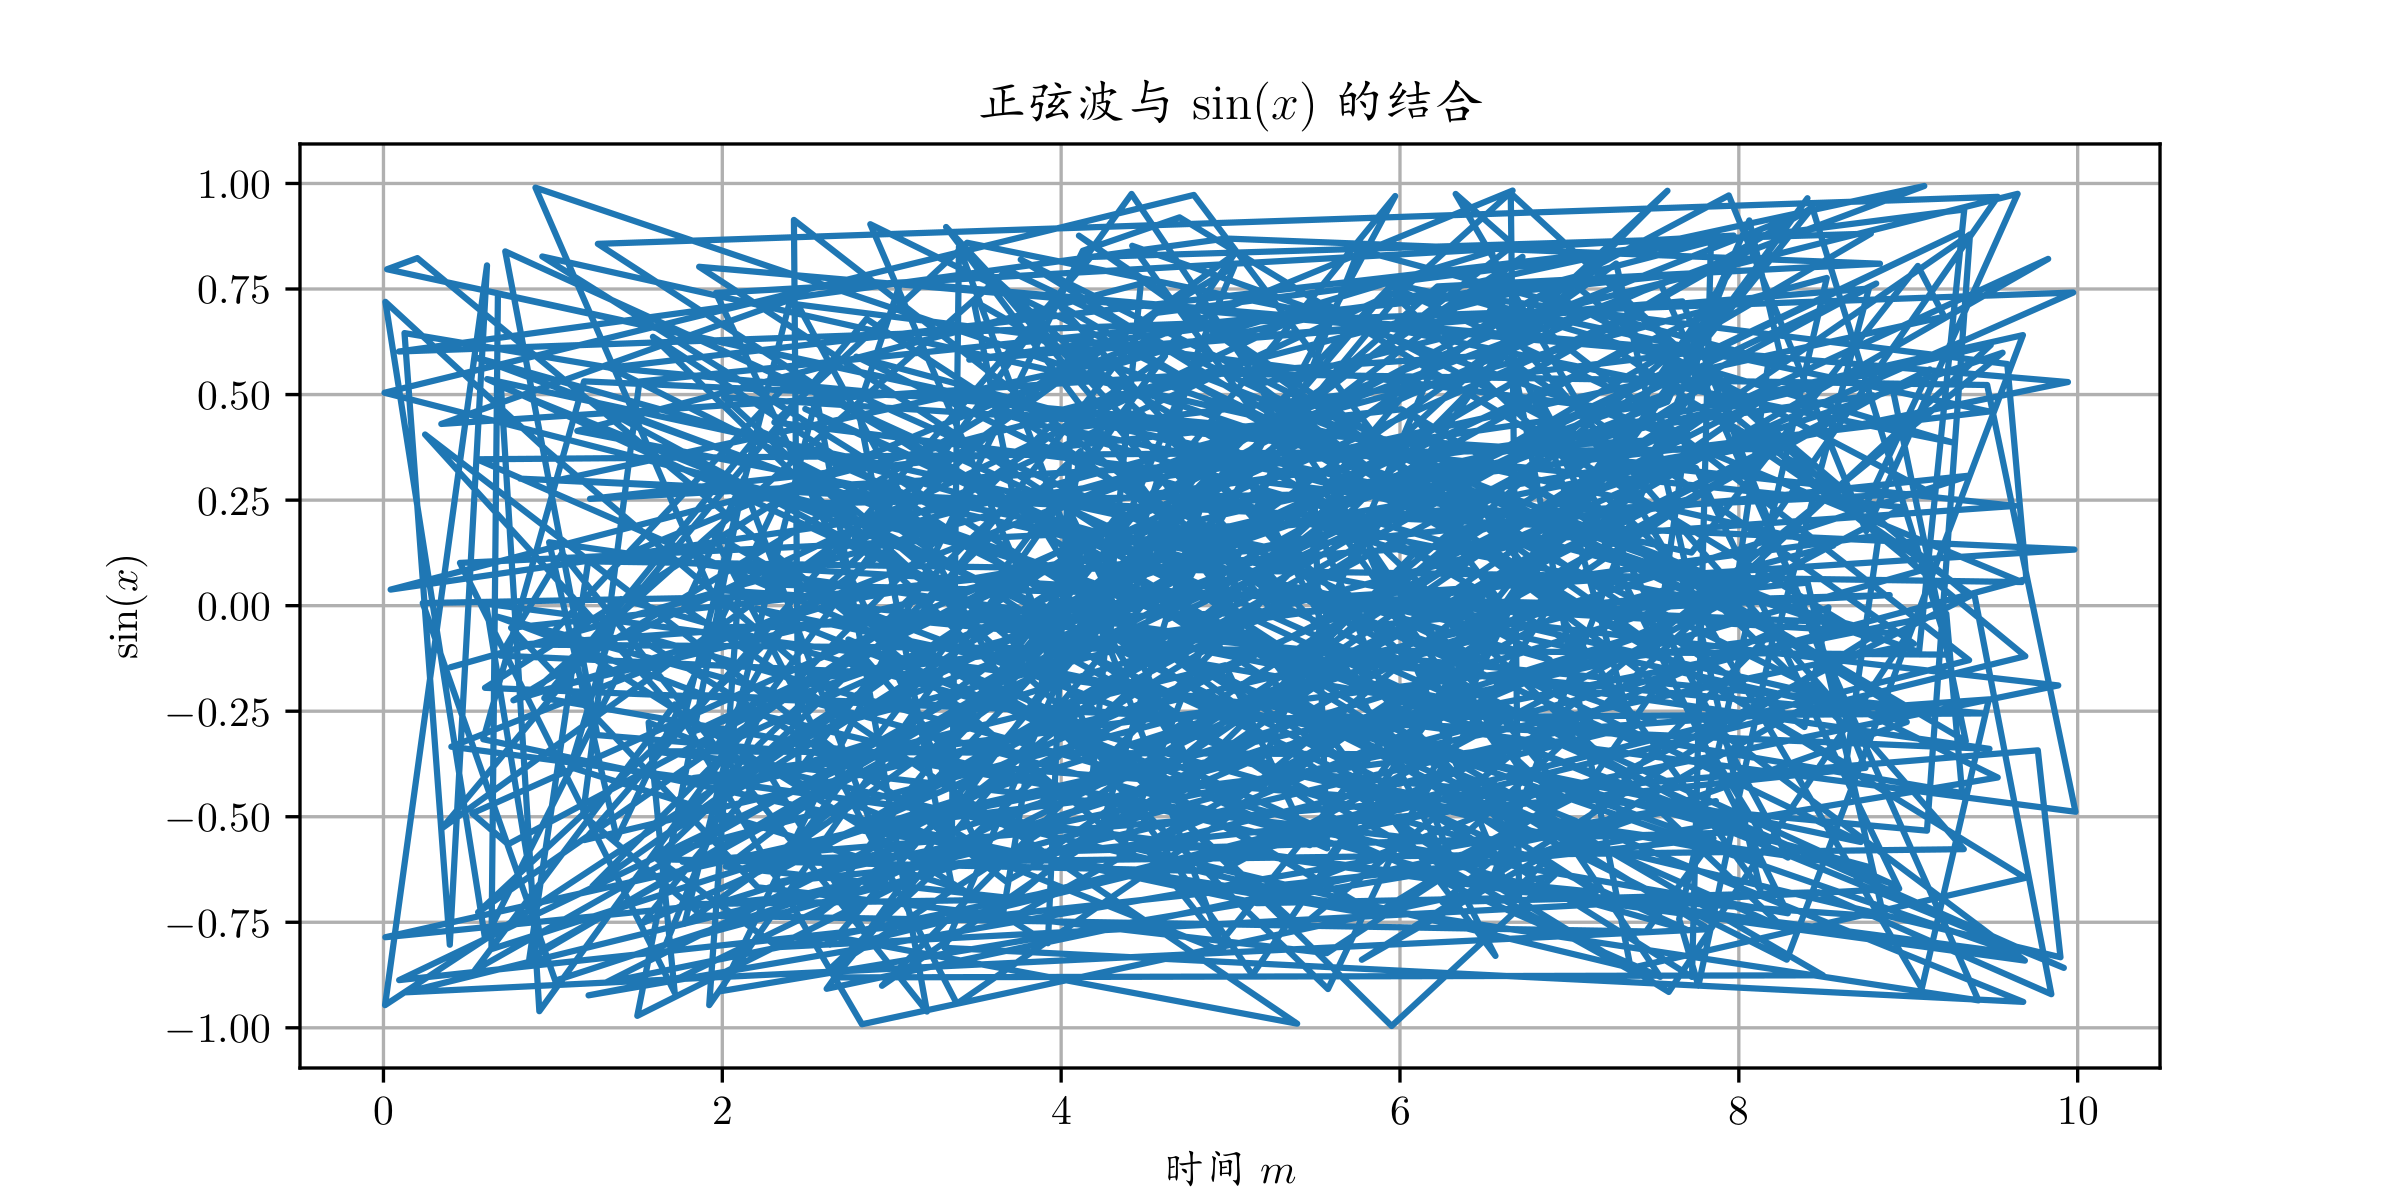

In [2]:
from arpy.visual import *
import random

# Generate random list of numbers for x and y data
x = [random.uniform(0, 10) for _ in range(500)]
y = [random.uniform(-1, 1) for _ in range(500)]

# Use the function with random data
plot(x_data=x, y_data=y, xlabel=r"时间 $m$", ylabel=r"$\sin(x)$", title=r"正弦波与 $\sin(x)$ 的结合")

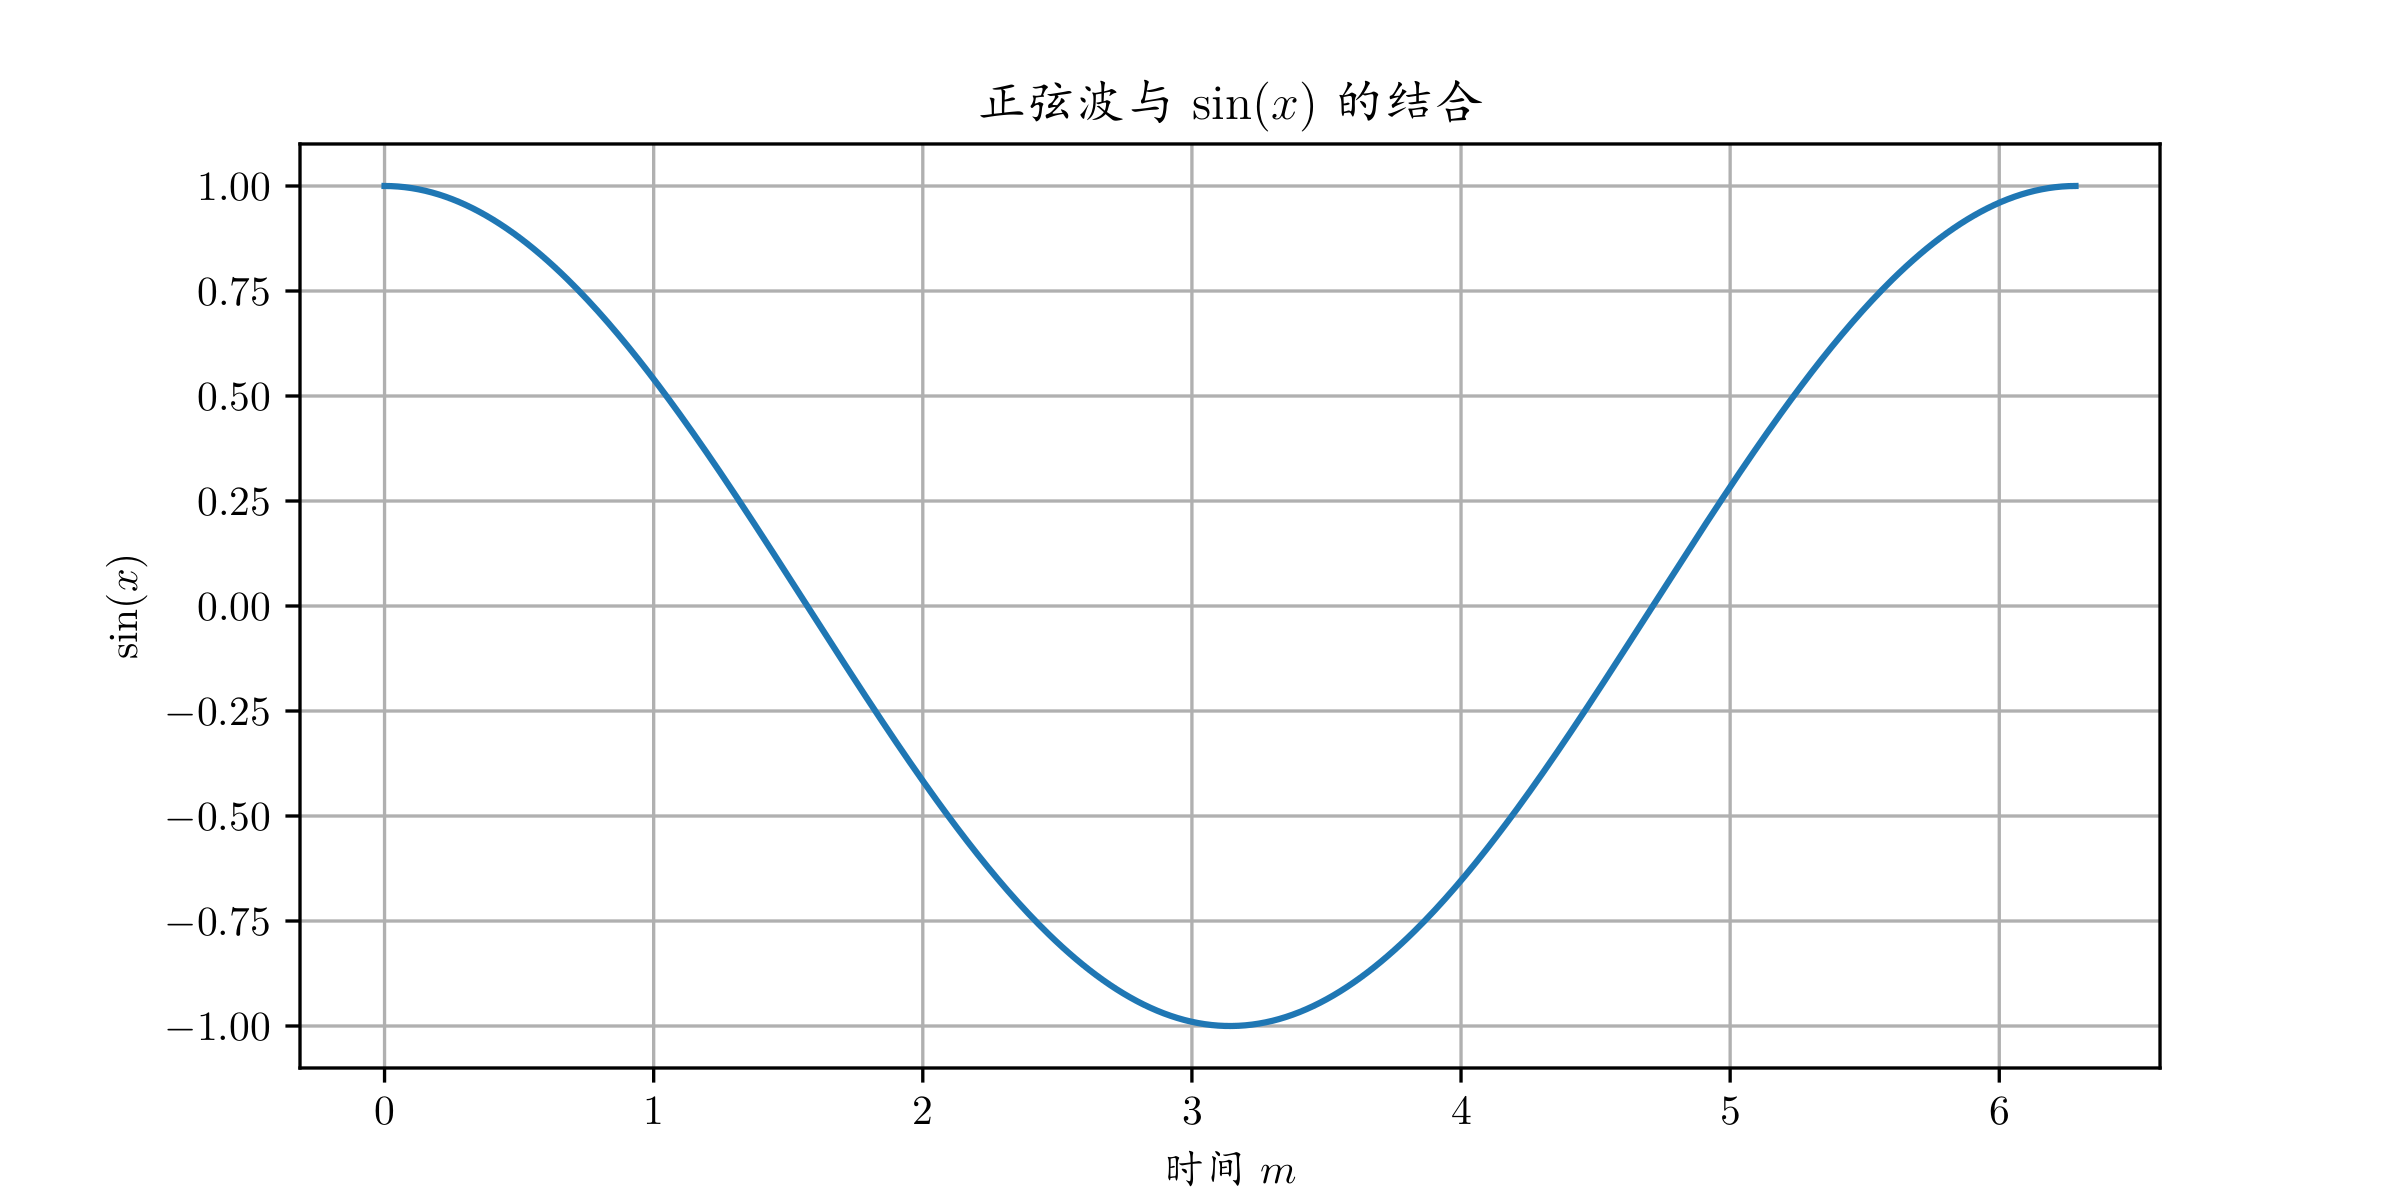

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
from IPython.display import display, Image as IPImage

def plot(x_data, y_data, xlabel, ylabel, title, z=1.0, s=(8, 4), dpi=300):
    # Switch to 'pgf' backend to render with LaTeX
    mpl.use("pgf")

    # Set up the configuration for LaTeX and fonts
    pgf_with_latex = {
        "pgf.rcfonts": False,  # Do not use default matplotlib fonts, use the one specified in font.family
        "text.usetex": True,  # Use LaTeX to write all text
        "font.family": "serif",  # Use serif fonts
        "font.serif": ["Times New Roman"],  # Use Times New Roman for English text
        "pgf.preamble": r"\usepackage{xeCJK}\setCJKmainfont{KaiTi} \usepackage{amsmath}",
    }

    mpl.rcParams.update(pgf_with_latex)

    # Create the plot
    plt.figure(figsize=s)  # Set figure size
    plt.plot(x_data, y_data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

    # Disable scientific notation (which causes asterisks in ticks)
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

    # Create an in-memory binary stream to store the image
    img_buffer = io.BytesIO()

    # Save the figure to this in-memory buffer as a PNG with DPI setting for quality control
    plt.savefig(img_buffer, format='png', dpi=dpi)  # Set dpi for higher quality (300 DPI is a common high-res setting)

    # Reset the buffer's position to the start
    img_buffer.seek(0)

    # Read the image to get its original dimensions
    image = Image.open(img_buffer)
    original_width, original_height = image.size

    # Calculate the new dimensions based on the zoom factor
    new_width = int(original_width * z)
    new_height = int(original_height * z)

    # Display the image with the resized dimensions
    display(IPImage(data=img_buffer.getvalue(), width=new_width, height=new_height))

    # Close the buffer when done (optional cleanup)
    img_buffer.close()

# Example of using the function
x = np.linspace(0, 2 * np.pi, 500)
y = np.cos(x)


plot(x_data=x, y_data=y, 
              xlabel=r"时间 $m$", ylabel=r"$\sin(x)$", 
              title=r"正弦波与 $\sin(x)$ 的结合", 
              z=0.5, s=(8,4), dpi=300)
